# Experiment Notebook: Network Issuance and Inflation Rate

## Table of Contents
* [Research Question](#Research-Question)
* [Experiment Summary](#Experiment-Summary)
* [Experiment Assumptions](#Experiment-Assumptions)
* [Experiment Setup](#Experiment-Setup)
* [Analysis 1: ...](#)

TODO: WIP analysis suggestions, using plots below

* Analysis 1: Historical Network Issuance
* Analysis 2: EIP1559 Scenarios (transaction rates, MEV, enabled/disabled)
* Analysis 3: Network Issuance Composition (incentives as pie-chart, EIP1559 vs PoW vs PoS at different stages)

---

# Research Question


# Experiment Summary 

The purpose of this notebook is to 

# Experiment Assumptions

Our model adopts a range of assumptions from the Hoban/Borgers Ethereum 2.0 Economic Model (notably all validator cost assumptions across validator environments).
Since the Hoban/Borgers Model was published pre-Altair and the CADLabs model post-Altair, however, some assumptions differ slightly (notably reward/penalty parameters incl. new sync committee).

See [assumptions document](ASSUMPTIONS.md) for further details.

# Experiment Setup

In [1]:
import copy
import logging
import numpy as np
import pandas as pd
from radcad import Engine

import setup
import experiments.notebooks.visualizations as visualizations
from experiments.run import run
from model.types import Stage

time: 1.53 s (started: 2021-06-29 12:05:28 +02:00)


In [2]:
import experiments.templates.time_domain_analysis as time_domain_analysis

time: 719 ms (started: 2021-06-29 12:05:30 +02:00)


In [3]:
logger = logging.getLogger()
logger.disabled = False

time: 24.4 ms (started: 2021-06-29 12:05:31 +02:00)


In [4]:
simulation = copy.deepcopy(time_domain_analysis.experiment.simulations[0])

time: 29.4 ms (started: 2021-06-29 12:05:31 +02:00)


In [5]:
df, _exceptions = run(simulation)

2021-06-29 12:05:31,167 - root - INFO - Running experiment
2021-06-29 12:05:31,331 - root - INFO - Starting simulation 0 / run 0 / subset 0
2021-06-29 12:05:37,094 - root - INFO - Experiment complete in 5.925096750259399 seconds
2021-06-29 12:05:37,096 - root - INFO - Post-processing results
2021-06-29 12:05:37,135 - numexpr.utils - INFO - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-06-29 12:05:37,135 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
2021-06-29 12:05:38,366 - root - INFO - Post-processing complete in 1.2720792293548584 seconds
time: 7.23 s (started: 2021-06-29 12:05:31 +02:00)


In [6]:
import model.constants as constants

df_ether_supply = pd.read_csv('../../data/ether_supply.csv')
df_ether_supply['timestamp'] = pd.to_datetime(df_ether_supply['UnixTimeStamp'], unit='s')
df_ether_supply = df_ether_supply.rename(columns={"Value": "eth_supply"})
df_ether_supply = df_ether_supply[['timestamp','eth_supply']]
df_ether_supply = df_ether_supply.set_index('timestamp', drop=False)
df_ether_supply['supply_inflation'] = \
    constants.epochs_per_year * (df_ether_supply['eth_supply'].shift(-1) - df_ether_supply['eth_supply']) \
    / (df_ether_supply['eth_supply'] * df['dt'].iloc[0])
df_ether_supply = df_ether_supply.fillna(method='bfill')
df_ether_supply['supply_inflation_pct'] = df_ether_supply['supply_inflation'] * 100
df_ether_supply

timestamp    eth_supply  supply_inflation  supply_inflation_pct
timestamp                                                                  
2015-07-30 2015-07-30  7.204931e+07          0.183469             18.346914
2015-07-31 2015-07-31  7.208550e+07          0.140381             14.038108
2015-08-01 2015-08-01  7.211320e+07          0.142948             14.294821
2015-08-02 2015-08-02  7.214143e+07          0.141643             14.164318
2015-08-03 2015-08-03  7.216940e+07          0.144127             14.412743
...               ...           ...               ...                   ...
2021-06-19 2021-06-19  1.163608e+08          0.042235              4.223522
2021-06-20 2021-06-20  1.163742e+08          0.041433              4.143256
2021-06-21 2021-06-21  1.163874e+08          0.042321              4.232146
2021-06-22 2021-06-22  1.164009e+08          0.042085              4.208514
2021-06-23 2021-06-23  1.164143e+08               NaN                   NaN

[2156 rows x 4 columns]

time: 60.9 ms (started: 2021-06-29 12:05:38 +02:00)


In [7]:
df = df.set_index('timestamp', drop=False)
df_historical = df_ether_supply.append(df)
df_historical

timestamp    eth_supply  \
timestamp                                                             
2015-07-30 00:00:00.000000 2015-07-30 00:00:00.000000  7.204931e+07   
2015-07-31 00:00:00.000000 2015-07-31 00:00:00.000000  7.208550e+07   
2015-08-01 00:00:00.000000 2015-08-01 00:00:00.000000  7.211320e+07   
2015-08-02 00:00:00.000000 2015-08-02 00:00:00.000000  7.214143e+07   
2015-08-03 00:00:00.000000 2015-08-03 00:00:00.000000  7.216940e+07   
...                                               ...           ...   
2026-05-29 12:05:29.878131 2026-05-29 12:05:29.878131  1.089656e+08   
2026-05-30 12:05:29.878131 2026-05-30 12:05:29.878131  1.089609e+08   
2026-05-31 12:05:29.878131 2026-05-31 12:05:29.878131  1.089563e+08   
2026-06-01 12:05:29.878131 2026-06-01 12:05:29.878131  1.089516e+08   
2026-06-02 12:05:29.878131 2026-06-02 12:05:29.878131  1.089469e+08   

                            supply_inflation  supply_inflation_pct  stage  \
timestamp                                                                   
2015-07-30 00:00:00.000000          0.183469             18.346914    NaN   
2015-07-31 00:00:00.000000          0.140381             14.038108    NaN   
2015-08-01 00:00:00.000000          0.142948             14.294821    NaN   
2015-08-02 00:00:00.000000          0.141643             14.164318    NaN   
2015-08-03 00:00:00.000000          0.144127             14.412743    NaN   
...                                      ...                   ...    ...   
2026-05-29 12:05:29.878131         -0.015718             -1.571841    4.0   
2026-05-30 12:05:29.878131         -0.015714             -1.571443    4.0   
2026-05-31 12:05:29.878131         -0.015710             -1.571042    4.0   
2026-06-01 12:05:29.878131         -0.015706             -1.570644    4.0   
2026-06-02 12:05:29.878131         -0.015702             -1.570244    4.0   

                              eth_price  eth_staked  network_issuance  \
timestamp                                                               
2015-07-30 00:00:00.000000          NaN         NaN               NaN   
2015-07-31 00:00:00.000000          NaN         NaN               NaN   
2015-08-01 00:00:00.000000          NaN         NaN               NaN   
2015-08-02 00:00:00.000000          NaN         NaN               NaN   
2015-08-03 00:00:00.000000          NaN         NaN               NaN   
...                                 ...         ...               ...   
2026-05-29 12:05:29.878131  1619.936738  44510496.0      -4689.571981   
2026-05-30 12:05:29.878131  1586.957035  44532096.0      -4688.181904   
2026-05-31 12:05:29.878131  1547.991972  44553696.0      -4686.785970   
2026-06-01 12:05:29.878131  1552.234117  44575296.0      -4685.395893   
2026-06-02 12:05:29.878131  1500.657651  44596896.0      -4683.999959   

                            pow_issuance  \
timestamp                                  
2015-07-30 00:00:00.000000           NaN   
2015-07-31 00:00:00.000000           NaN   
2015-08-01 00:00:00.000000           NaN   
2015-08-02 00:00:00.000000           NaN   
2015-08-03 00:00:00.000000           NaN   
...                                  ...   
2026-05-29 12:05:29.878131           0.0   
2026-05-30 12:05:29.878131           0.0   
2026-05-31 12:05:29.878131           0.0   
2026-06-01 12:05:29.878131           0.0   
2026-06-02 12:05:29.878131           0.0   

                            number_of_validators_in_activation_queue  ...  \
timestamp                                                             ...   
2015-07-30 00:00:00.000000                                       NaN  ...   
2015-07-31 00:00:00.000000                                       NaN  ...   
2015-08-01 00:00:00.000000                                       NaN  ...   
2015-08-02 00:00:00.000000                                       NaN  ...   
2015-08-03 00:00:00.000000                                       NaN  ...   
...                                                     

time: 72.8 ms (started: 2021-06-29 12:05:38 +02:00)


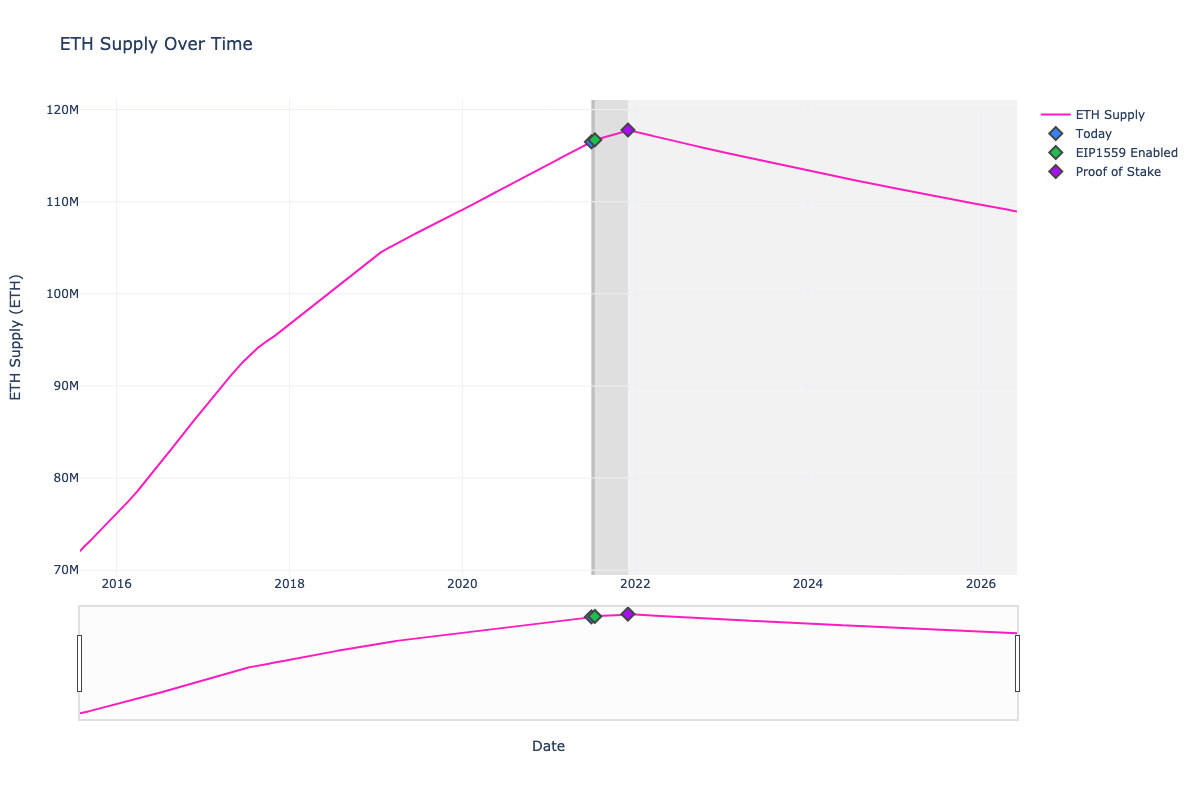

time: 366 ms (started: 2021-06-29 12:05:38 +02:00)


In [8]:
visualizations.plot_eth_supply_over_all_stages(df_historical)

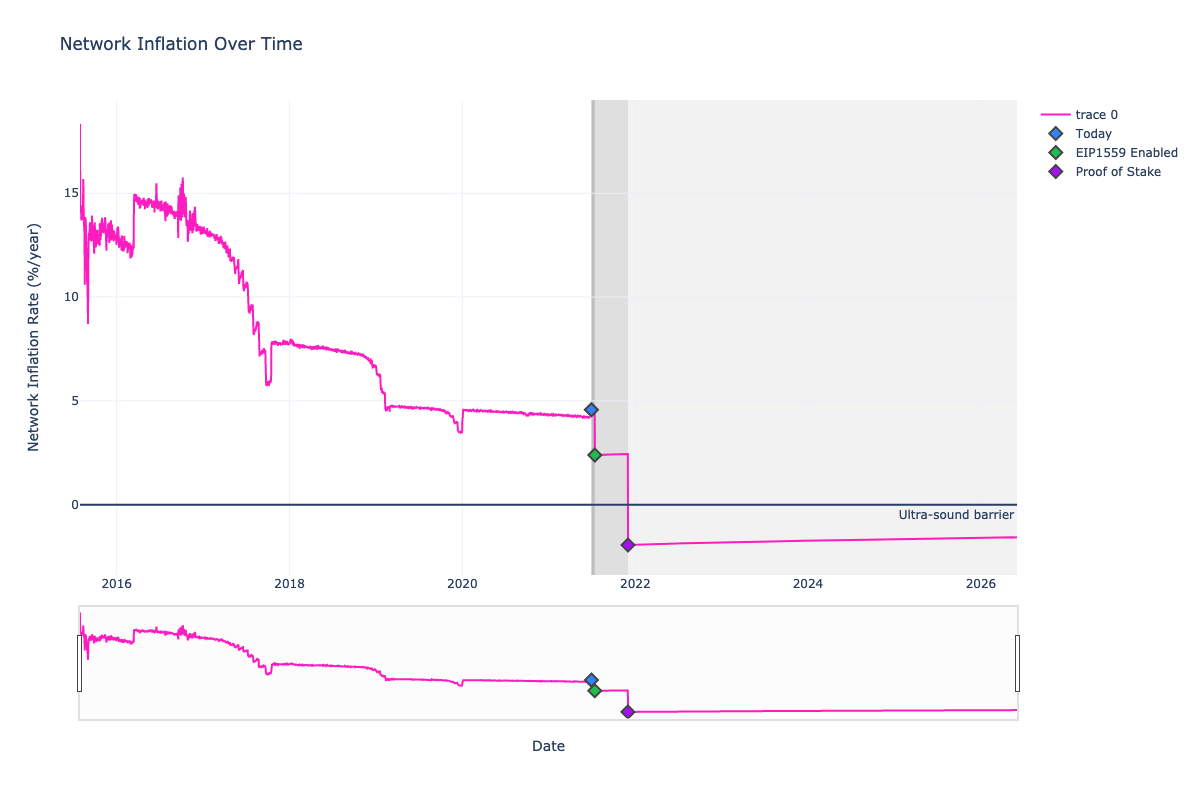

time: 252 ms (started: 2021-06-29 12:05:38 +02:00)


In [9]:
visualizations.plot_network_inflation_over_all_stages(df_historical)

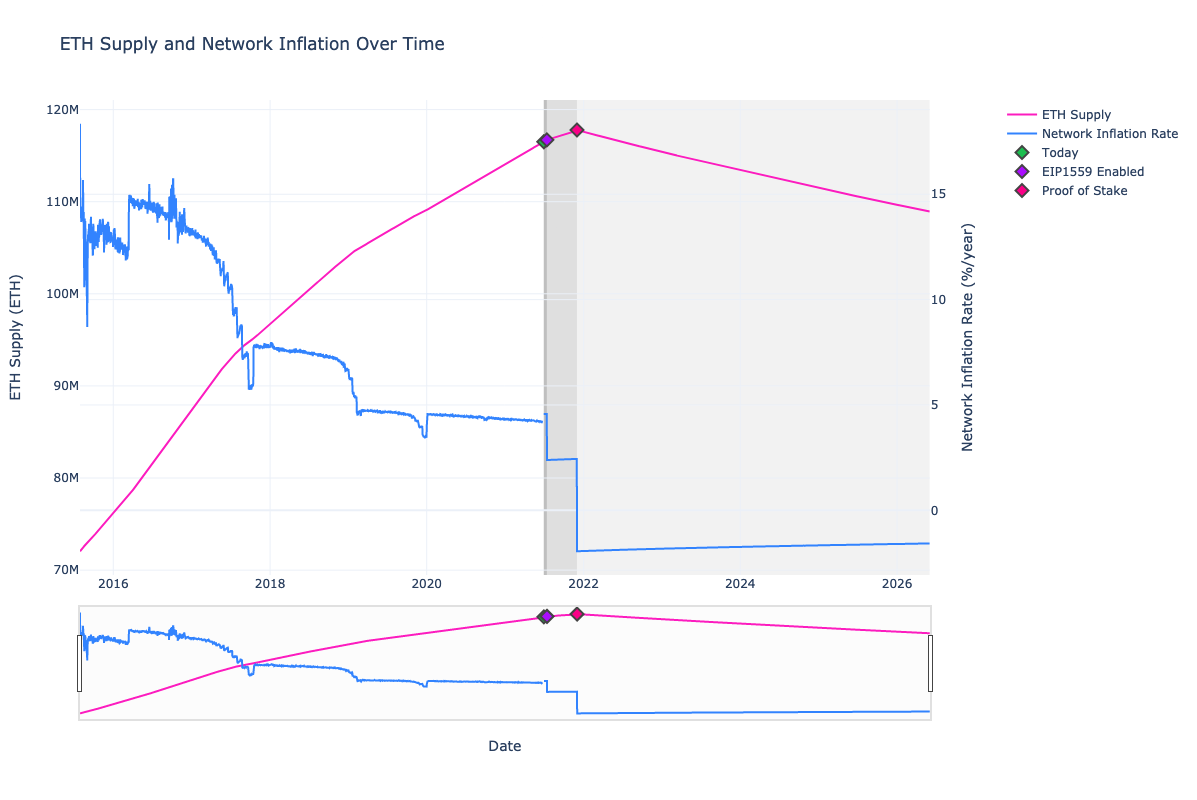

time: 526 ms (started: 2021-06-29 12:05:39 +02:00)


In [10]:
# TODO: frame analysis as "Justin Drake" analysis
# TODO: add historical upgrade milestones from Barnabe (all grey)
# TODO: add ultra-sound barrier annotation
visualizations.plot_eth_supply_and_inflation_over_all_stages(df_historical)